## TODO
- write the backprob loop
- write gradient check
- save the model
- and then start testing models

In [1]:
import seaborn as sb
import numpy as np
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

/home/chahuja/env/tf/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Load Data
train = np.genfromtxt('digitstrain.txt', delimiter=',')
test = np.genfromtxt('digitstest.txt', delimiter=',')
val = np.genfromtxt('digitsvalid.txt', delimiter=',')

## Plotting Image of a training input

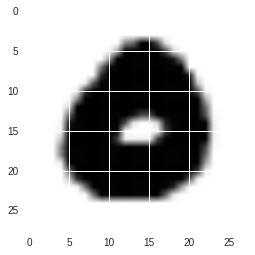

In [3]:
# Plotting the image
plt.imshow(train[0,:-1].reshape((28,28)))
## The image is squeezed row-wise

## Class description
```sh
graph - [num_nodes(int), num_nodes(int), ...]
each layer ends with sigmoid
graph ends with softmax and crossentropy loss
```

In [30]:
# Basic loss/activation functions and their gradients which are codenamed "inv"
# These functions are defined with input as numpy.matrix format.
# things may go haywire if numpy.array is used 
# even though numpy.matrix inherits properties from numpy.array
def cross_entropy_loss(vec, gt):
  return -gt*np.log(vec)
  
def sigmoid(mat):
  return 1./(1+ np.exp(-mat))

def inv_sigmoid(mat):
  return sigmoid(mat)*(1-sigmoid(mat))

def softmax(vec):
  return np.concatenate(
    tuple([np.exp(vec[i,:])*1./np.exp(vec[i,:]).sum() for i in range(vec.shape[0])])
    , axis = 0)

def inv_softmax_with_loss(vec, gt):
  # gt - ground truth in one hot vector format
  if (vec.shape != gt.shape):
    raise Exception("Prediction and Expected Values must have the same dimensions")
    
  return softmax(vec) - gt

def relu(value):
  if (value<=0):
    return 0
  else:
    return value

In [154]:
class NN(object):
  def __init__(self,graph):
    self.graph = graph
    self.weights = list()
    
    prev_dim = -1
    for dim in self.graph:
        if (prev_dim > 0):
          # set the high and low bounds for the random initialization 
          # based on xxx rule
          high = np.sqrt(6.0/(prev_dim + dim))
          low = -high
          # prev_dim + 1 to include a row for bias 
          self.weights.append(np.random.uniform(low=low,high=high,size=(prev_dim+1,dim)))
        prev_dim = dim

  def forward(self,X,limit = -1, activation = True):
    # We use the forward function to calculate the forward prop
    ## while training the model, various segments of the forward prop are required
    ## which need to be extracted at the right times
    # "limit" and "activation" define the layers that have to be removed from the end
    ## limit = -1 refers to complete calculation
    #--------------------------
    ### limit = -1 and activation=False is an invalid selection with no error check
    #--------------------------
    ## limit = 0 ignores the softmax function
    ## limit = 0 and activation=False ignores the softmax and sigmoid function
    
    # add a column of ones to take care of the bias
    X = np.concatenate((X,np.expand_dims(np.ones_like(X[:,0]),axis=1)), axis = 1)
    X = np.mat(X)
    # Converting input to matrix form
    for k in range(len(self.weights)-relu(limit)):
      A = X*np.mat(self.weights[k])
      # Stopping and taking activation if required
      if (k == range(len(self.weights)-relu(limit))[-1] and activation == False):
        X = A
        break
      X = sigmoid(A)
      X = np.concatenate((X,np.ones_like(X[:,0])), axis = 1)
    
    if (limit >= 0 or activation==False):
      return X
    
    # Removing the extra layer of ones before softmax
    X = X[:,:-1]
    return softmax(X)

In [196]:
model = NN([784,100,50,10])

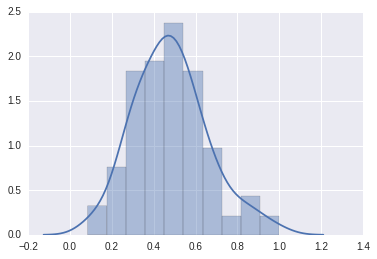

In [208]:
sb.distplot(model.forward(train[0:2,:-1],2)[0])

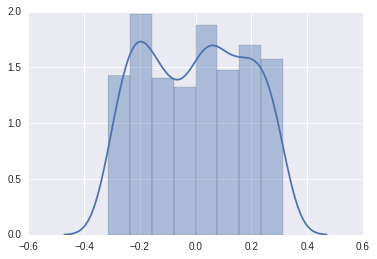

In [200]:
i = 2
sb.distplot(model.weights[i].reshape((np.prod(model.weights[i].shape),)))

In [107]:
print([model.weights[i].shape for i in range(len(model.weights))])

[(785, 100), (101, 10)]
